# Phase curve analysis of KELT-1b TESS Sectors 17 and 57
## 3. Posterior distribution plots

**Author:** Hannu Parviainen </br>
**Last updated:** 2 Feb 2023

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import xarray as xa
import seaborn as sb

from arviz.stats.density_utils import _kde_linear as kde

In [3]:
from src.lpf import KELT1LPF
from src.kelt1 import AAOCW, AAPGW

In [4]:
with xa.load_dataset('results/01_gp_fit.nc') as ds:
    df = pd.DataFrame(ds.mcmc_samples.values.reshape((-1, ds.parameter.size)),
                      columns=ds.parameter)

with xa.load_dataset('results/parviainen2022_03b.nc') as ds:
    dfc = pd.DataFrame(ds.mcmc_samples.values.reshape((-1, ds.parameter.size)),
                      columns=ds.parameter)

**Note:** The dayside surface brightness ratios are not the same as the maximum surface brightness ratios (because we allow for a free spot offset), but the difference is small enough that we can consider them equal here. 

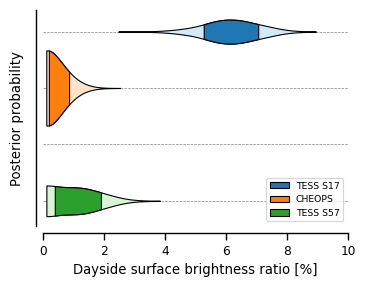

In [17]:
with sb.plotting_context('paper'):
    fig, ax = subplots(figsize=(AAOCW, 0.8*AAOCW))
    labels = 'TESS S17', 'CHEOPS', 'TESS S57'
    offsets = (0, 2, 6)
    for i,s in enumerate((df.log10_ted_T17, dfc.log10_ted_CHEOPS, df.log10_ted_T57)):
        d = 100*10**s
        x, y = kde(d, bw=0.3)
        yoffset = offsets[i]
        ax.fill_between(x, -y-yoffset, y-yoffset, fc=sb.utils.set_hls_values(f'C{i}', l=0.9), ec='k')
        p = percentile(d, [16, 84])
        m = (x > p[0]) & (x < p[1])
        ax.fill_between(x[m], -y[m]-yoffset, y[m]-yoffset, fc=f'C{i}', ec='k', label=labels[i])
    [ax.axhline(-v, zorder=-5, c='0.5', ls='--', lw=0.5) for v in arange(0,7,2)]
    ax.legend(fontsize='x-small', loc=4)
    sb.despine(fig, offset=5)
    setp(ax, xlabel='Dayside surface brightness ratio [%]', yticks=[], ylabel='Posterior probability', xlim=(0, 10))
    fig.tight_layout()
    fig.subplots_adjust(left=0.1, right=0.98, bottom=0.2, top=0.98, hspace=0.02)
fig.savefig('plots/04_brightness_ratios.pdf')

<AxesSubplot:>

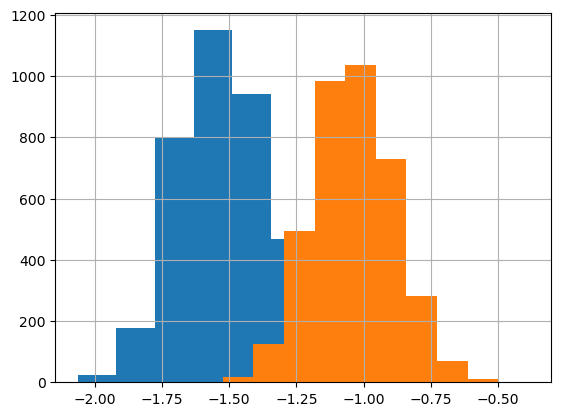

In [13]:
df.gp_T17_ln_in.hist()
df.gp_T57_ln_in.hist()

<AxesSubplot:>

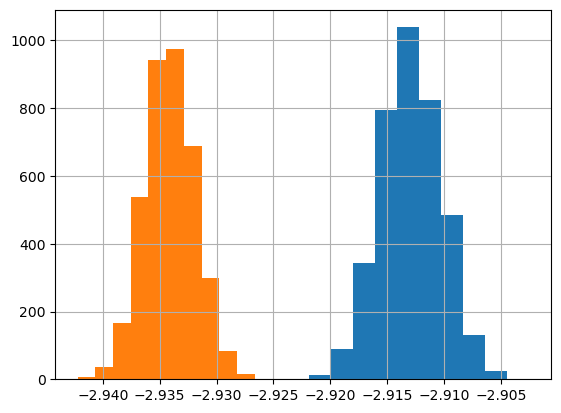

In [16]:
df.gp_T17_log10_wn.hist()
df.gp_T57_log10_wn.hist()

<AxesSubplot:>

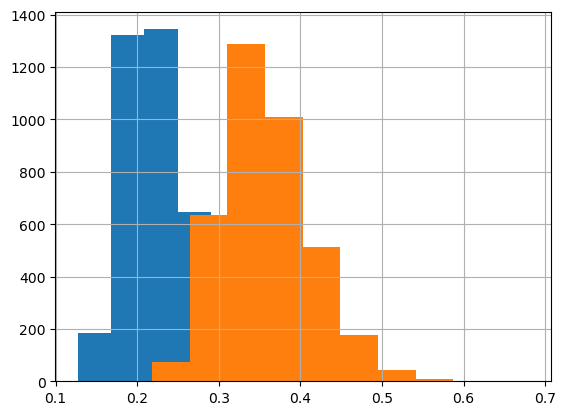

In [14]:
exp(df.gp_T17_ln_in).hist()
exp(df.gp_T57_ln_in).hist()

---

<center>&copy;2023 Hannu Parviainen</center>